# Simple MC tests to explore efficiency issues. 

In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%autoreload 2
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import uproot4
from lmfit import minimize, Parameters, fit_report

# Jupyter Lab imports.
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

# Path to local imports.
sys.path.append("/home/drew/He6CRES/rocks_analysis_pipeline/")
from results import ExperimentResults
from rocks_utility import he6cres_db_query

# Path to local imports.
sys.path.append("/home/drew/He6CRES/he6-cres-spec-sims/")

# Local imports.
import he6_cres_spec_sims.spec_tools.spec_calc.spec_calc as sc
import he6_cres_spec_sims.experiment as exp

# Local imports for plotting ratios and such. 
import analysis_functions.ratio_experiment as re
import analysis_functions.ratio_prediction as rp

# Plot font size
plt.rcParams.update({'font.size': 50})

## Effect #1: Events coming up from below.

Notes: 

* bl == baseline

Issues with this study: 

* We aren't gaurenteed to see everything within this extended BW, you still need to account for the fact that something could be born in the bottom part of the extended bandwidth and not cross the "0" MHz line to be observed. What is the probability of that? This could be calculated but may be better addressed with a simple MC study. Could I incorporate this into my real MC in a simple way?? 

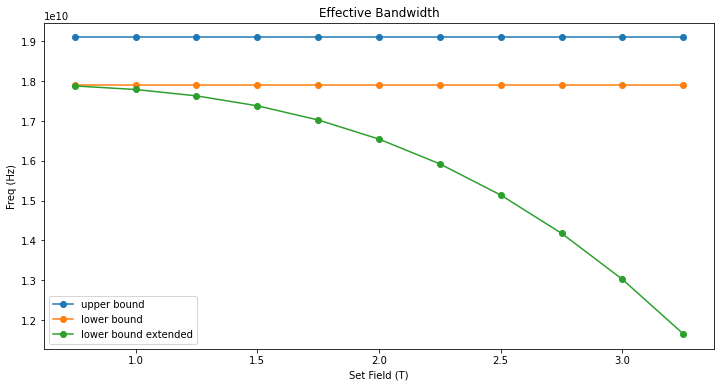

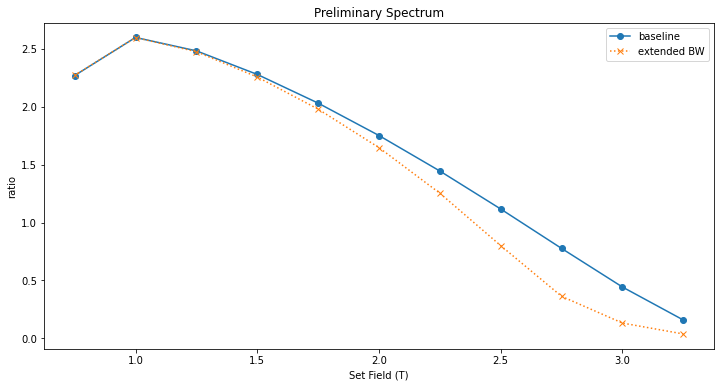

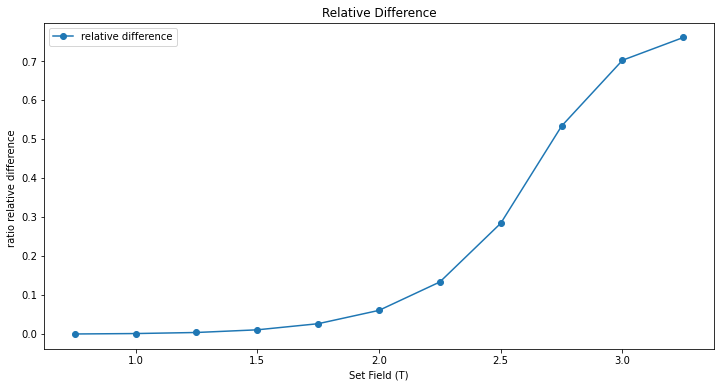

In [16]:
%matplotlib inline

# Set fields to use.
set_fields = np.arange(.75,3.5,.25)

# Freq_BW
freq_BW = np.array([17.9e9 ,  19.1e9])

# Build baseline ratio
freq_BWs_bl = np.tile(freq_BW, (len(set_fields), 1))


# Build extended BW ratio, from slope.

# Trap Slew timing. 
slew_time = 35e-3

powers = sc.power_larmor(set_fields, freq_BW.mean())
energys = sc.freq_to_energy(freq_BW.mean(), set_fields)
slopes = sc.df_dt(energys, set_fields, powers)

freq_BW_extenstion = slopes*slew_time 
freq_BWs_ext = freq_BWs_bl
freq_BWs_ext[:,0] = freq_BWs_bl[:,0] - freq_BW_extenstion

freq_BWs_bl = np.tile(freq_BW, (len(set_fields), 1))

# Plot extended BWs
fig0, ax0 = plt.subplots(figsize=(12,6))
ax0.plot(set_fields, freq_BWs_ext[:,1],  label = f"upper bound", marker='o', ms=6)
ax0.plot(set_fields, freq_BWs_bl[:,0],  label = f"lower bound", marker='o', ms=6)
ax0.plot(set_fields, freq_BWs_ext[:,0],  label = f"lower bound extended", marker='o', ms=6)
ax0.set_ylabel('Freq (Hz)')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Effective Bandwidth")
ax0.legend()
plt.show()

# Get expected ratios
ratio_bl = rp.AUC_expectation(set_fields, freq_BWs_bl, b = 0, plot = False)
ratio_ext = rp.AUC_expectation(set_fields, freq_BWs_ext, b = 0, plot = False)


# Plot ratios.
fig0, ax0 = plt.subplots(figsize=(12,6))

ax0.plot(ratio_bl.index, ratio_bl.Ratio,  label = f"baseline", marker='o', ms=6)
ax0.plot(ratio_ext.index, ratio_ext.Ratio,  label = f"extended BW", marker='x',ls = "dotted", ms=6)

ax0.set_ylabel('ratio')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Preliminary Spectrum")
ax0.legend()
plt.show()

fig0, ax0 = plt.subplots(figsize=(12,6))

ax0.plot(ratio_bl.index, (ratio_bl.Ratio - ratio_ext.Ratio) / ratio_bl.Ratio ,  label = f"relative difference", marker='o', ms=6)
# ax0.plot(ratio_ext.index, ratio_ext.Ratio,  label = f"baseline", marker='o', ms=6)

ax0.set_ylabel('ratio relative difference ')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Relative Difference")
ax0.legend()
plt.show()

## Effect #2: Frequency dependent detection efficiency.

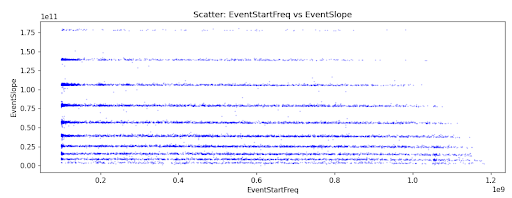

[0.0e+00 3.0e+07 6.0e+07 9.0e+07 1.2e+08 1.5e+08 1.8e+08 2.1e+08 2.4e+08
 2.7e+08 3.0e+08]


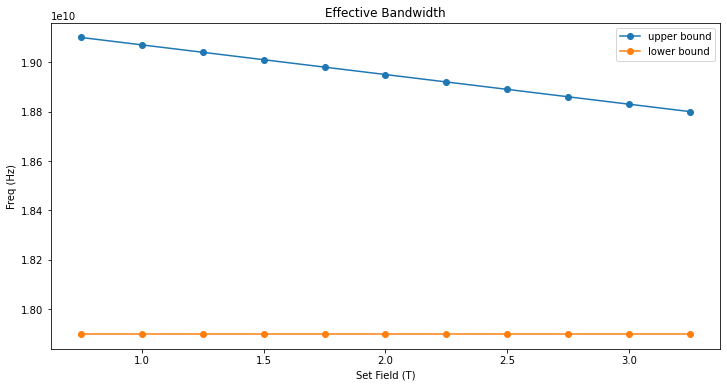

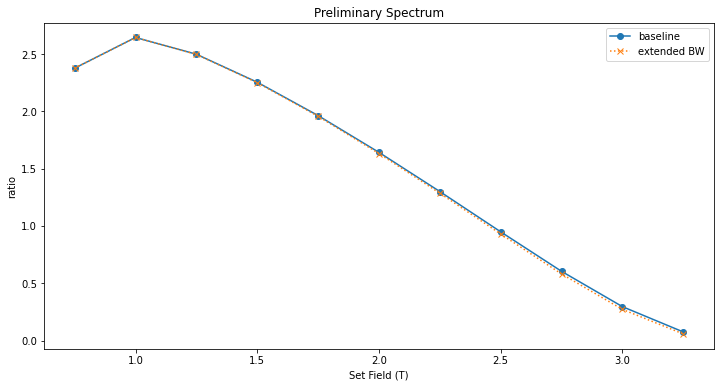

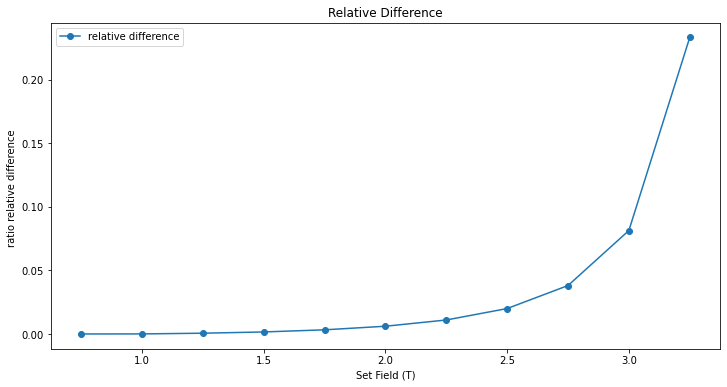

In [55]:
%matplotlib inline

# Set fields to use.
set_fields = np.arange(.75,3.5,.25)

# Freq_BW
freq_BW = np.array([17.9e9 ,  19.1e9])

# Build baseline ratio
freq_BWs_bl = np.tile(freq_BW, (len(set_fields), 1))


# Build extended BW ratio, from slope.

# Trap Slew timing. 
slew_time = 35e-3

powers = sc.power_larmor(set_fields, freq_BW.mean())
energys = sc.freq_to_energy(freq_BW.mean(), set_fields)
slopes = sc.df_dt(energys, set_fields, powers)

freq_BW_reduction = np.linspace(0,300e6,len(set_fields))
print(freq_BW_reduction)
freq_BWs_ext = freq_BWs_bl
freq_BWs_ext[:,1] = freq_BWs_bl[:,1] - freq_BW_reduction


# Plot extended BWs
fig0, ax0 = plt.subplots(figsize=(12,6))
ax0.plot(set_fields, freq_BWs_ext[:,1],  label = f"upper bound", marker='o', ms=6)
ax0.plot(set_fields, freq_BWs_ext[:,0],  label = f"lower bound", marker='o', ms=6)
ax0.set_ylabel('Freq (Hz)')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Effective Bandwidth")
ax0.legend()
plt.show()

# Get expected ratios
ratio_bl = rp.AUC_expectation(set_fields, freq_BWs, b = 0, plot = False)
ratio_ext = rp.AUC_expectation(set_fields, freq_BWs_ext, b = 0, plot = False)


# Plot ratios.
fig0, ax0 = plt.subplots(figsize=(12,6))

ax0.plot(ratio_bl.index, ratio_bl.Ratio,  label = f"baseline", marker='o', ms=6)
ax0.plot(ratio_ext.index, ratio_ext.Ratio,  label = f"extended BW", marker='x',ls = "dotted", ms=6)

ax0.set_ylabel('ratio')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Preliminary Spectrum")
ax0.legend()
plt.show()

fig0, ax0 = plt.subplots(figsize=(12,6))

ax0.plot(ratio_bl.index, (ratio_bl.Ratio - ratio_ext.Ratio) / ratio_bl.Ratio ,  label = f"relative difference", marker='o', ms=6)


ax0.set_ylabel('ratio relative difference ')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Relative Difference")
ax0.legend()
plt.show()

## Effect #3: Sinusoidal detection efficiency.

* Going to be harder, and likely better suited to the real deal MC. 